In [1]:
# Process data as illustrated in 02-eda
%run 03-process.py

DataFrame loaded into base, 1558278 records
Processed, 869044 records remaining


C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\io\parsers.py:1130: DtypeWarning: Columns (8,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
# creating advanced metrics, then defining which I'll use to model
import pandas as pd
from seaborn import plt
import seaborn as sns
%matplotlib inline

metrics = ['ASSESSED_IMP_VALUE',
           'landval_perc',
           'BED',
           'BATH',
           'AGE',
           'STORIES',
           # 'GARAGE_TYPE',
           'PARKING',
           'TOTAL_UNITS',
           # 'POOL',
           # 'FIREPLACE',
           'BUILDING_AREA',
           'lot_perc',
           'ptype']

X = basef2[metrics]
basef2[metrics].head()

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,PARKING,TOTAL_UNITS,BUILDING_AREA,lot_perc,ptype
0,61857,0.249996,2,1.0,119,2,0,0,572,0.7712,SFR
1,300000,0.300000,2,0.5,119,2,0,0,572,0.7712,SFR
2,143292,0.122038,4,2.0,119,2,0,0,1672,0.3312,SFR
3,83386,0.327273,4,1.5,119,2,0,0,1144,0.5424,SFR
4,56096,0.324319,4,2.0,129,2,0,1,1594,0.3624,MFR


In [3]:
dummies = pd.get_dummies(X.ptype)
X_cont = X.iloc[:,0:-1]
X_dum = pd.concat([X_cont, dummies], axis = 1)
X_dum.head()

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,PARKING,TOTAL_UNITS,BUILDING_AREA,lot_perc,CONDO,COOP,MFR,MOBILE,SFR,SFR-PUD,TOWNHOUSE
0,61857,0.249996,2,1.0,119,2,0,0,572,0.7712,0,0,0,0,1,0,0
1,300000,0.300000,2,0.5,119,2,0,0,572,0.7712,0,0,0,0,1,0,0
2,143292,0.122038,4,2.0,119,2,0,0,1672,0.3312,0,0,0,0,1,0,0
3,83386,0.327273,4,1.5,119,2,0,0,1144,0.5424,0,0,0,0,1,0,0
4,56096,0.324319,4,2.0,129,2,0,1,1594,0.3624,0,0,1,0,0,0,0


In [ ]:
# takes a long time to run!!
# plt.figure(figsize=(12,12))
# sns.pairplot(X_dum)

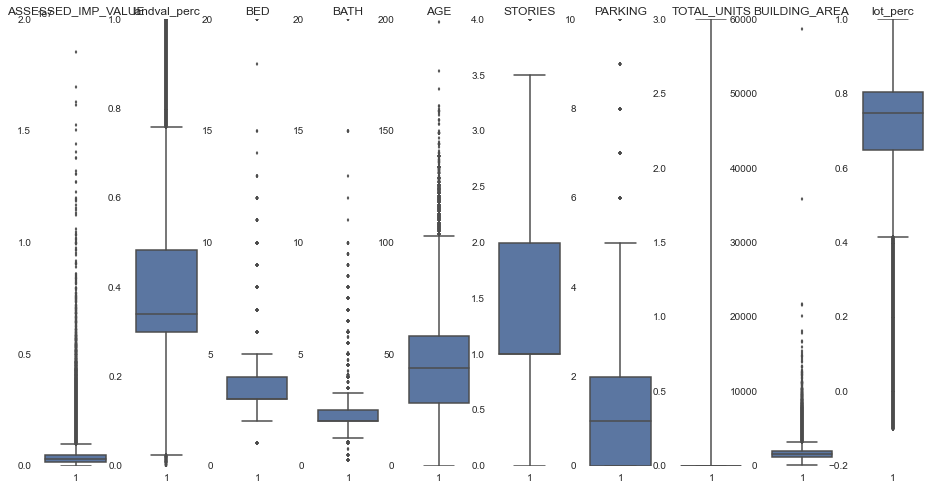

In [4]:
fig = plt.figure(figsize=(16,8))

for i in range(len(X_cont.columns)):
    ax = fig.add_subplot(1, len(X_cont.columns), i+1)
    sns.boxplot(X_cont.iloc[:,i])
    ax.set_title(X_cont.columns[i])

In [5]:
from sklearn.preprocessing import scale

# not scaling dummy variables since it looks weird
X_scaled = scale(X_cont)
X_scaled = pd.DataFrame(X_scaled, columns = X_cont.columns, index = X_cont.index)
X_het = pd.concat([X_scaled, dummies], axis = 1)
X_het.describe().T

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:153: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


,count,mean,std,min,25%,50%,75%,max
ASSESSED_IMP_VALUE,869044,-1.222089e-13,1.000001,-1.004578,-0.597642,-0.227793,0.281298,48.649153
landval_perc,869044,3.616543e-14,1.000001,-2.489963,-0.606008,-0.350653,0.548740,3.789561
BED,869044,3.287833e-13,1.000001,-2.434412,-0.280103,-0.280103,0.797052,18.031525
BATH,869044,7.269484e-13,1.000001,-2.367367,-0.115582,-0.115582,0.527785,23.045639
AGE,869044,4.007911e-12,1.000001,-1.881564,-0.719669,-0.055729,0.525218,6.376189
STORIES,869044,-9.080934e-14,1.000001,-2.770645,-0.658427,-0.658427,1.453791,5.678227
PARKING,869044,-1.373612e-12,1.000001,-1.013395,-1.013395,-0.047885,0.917625,8.641703
TOTAL_UNITS,869044,2.431935e-12,1.000001,-0.343086,-0.343086,-0.343086,-0.343086,7.183915
BUILDING_AREA,869044,-4.229520e-13,1.000001,-2.168576,-0.669434,-0.222417,0.419488,77.608957
lot_perc,869044,4.320731e-15,1.000001,-4.302155,-0.259320,0.274498,0.582537,1.638763


In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ASSESSED_IMP_VALUE,869044,375230.206046,373518.530637,2.000000,152000.000000,290145.500000,480300.000000,18546580.000000
landval_perc,869044,0.396494,0.159231,0.000015,0.299999,0.340659,0.483871,0.999910
BED,869044,3.260040,0.928372,1.000000,3.000000,3.000000,4.000000,20.000000
BATH,869044,2.089826,0.777162,0.250000,2.000000,2.000000,2.500000,20.000000
AGE,869044,45.342996,24.098579,0.000000,28.000000,44.000000,58.000000,199.000000
STORIES,869044,1.311723,0.473436,0.000000,1.000000,1.000000,2.000000,4.000000
PARKING,869044,1.049596,1.035723,0.000000,0.000000,1.000000,2.000000,10.000000
TOTAL_UNITS,869044,0.136742,0.398565,0.000000,0.000000,0.000000,0.000000,3.000000
BUILDING_AREA,869044,1717.199303,733.753371,126.000000,1226.000000,1554.000000,2025.000000,58663.000000
lot_perc,869044,0.696508,0.185115,-0.099885,0.648504,0.747321,0.804344,0.999867


In [7]:
print len(X_het[X_scaled.STORIES > 5]) | len(X_het[X_scaled.TOTAL_UNITS > 5])
XS = X_het[(X_scaled.STORIES <= 5) & (X_scaled.TOTAL_UNITS <= 5)]
print len(XS)

X_pca = X_scaled[(X_scaled.STORIES <= 5) & (X_scaled.TOTAL_UNITS <= 5)]

2871
866126


- **X:** basef2[metrics]
- **X_cont:** X minus ptype
- **X_dum:** ptype dummies
- **X_scaled:** X_cont scaled
- **X_het:** X_scaled + X_dum
- **XS:** X_het where stories and total_units are less than 5 stdev away
- **X_pca:** X_scaled where stories and total_units are less than 5 stdev away

#PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ASSESSED_IMP_VALUE,0.331210,-0.410668,0.305217,-0.170172,0.086726,-0.552182,-0.026669,-0.033076,-0.456640,0.277097
landval_perc,-0.052213,-0.598199,0.499108,0.020727,0.264233,0.461476,0.066000,0.191181,0.211562,-0.146458
BED,0.381523,0.003252,-0.169198,-0.244324,-0.335931,0.535046,0.355458,0.185536,-0.447922,0.074670
BATH,0.474446,0.073380,-0.016289,-0.143317,0.022286,-0.019867,0.120107,0.071117,0.662903,0.537491
AGE,-0.322274,-0.182244,0.226127,-0.272152,-0.658784,0.099880,-0.172284,-0.445602,0.117222,0.227530
STORIES,0.320360,0.297951,0.315660,0.157445,-0.084653,0.229022,-0.761570,0.168653,-0.121278,0.037502
PARKING,0.281045,-0.329647,-0.384821,0.399548,0.171434,0.234914,-0.160802,-0.620407,-0.054944,0.079157
TOTAL_UNITS,-0.035964,0.339905,0.172813,-0.571718,0.531425,0.207813,-0.002818,-0.433850,-0.110784,0.018448
BUILDING_AREA,0.461836,-0.054894,0.026707,-0.251543,-0.211136,-0.185753,-0.016106,-0.180826,0.245540,-0.739850
lot_perc,-0.129818,-0.344835,-0.547175,-0.491679,0.108491,0.012822,-0.467291,0.300067,0.051150,0.011593


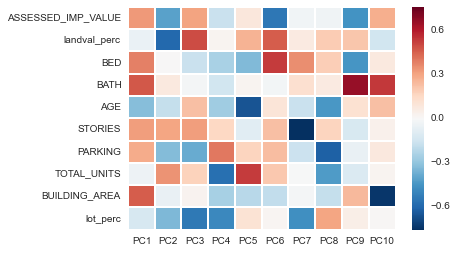

In [8]:
from sklearn.decomposition import PCA

pca = PCA(whiten = True)
pca.fit(X_pca)

# check out the loadings
loadings = pd.DataFrame(pca.components_, index = map('PC{}'.format, range(1,len(X_scaled.columns)+1)), columns = X_scaled.columns).T
sns.heatmap(loadings)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Variance Ratio,0.350604,0.139061,0.120025,0.110880,0.078382,0.057682,0.052385,0.042904,0.028765,0.019314
Cumulative Variance Ratio,0.350604,0.489664,0.609689,0.720569,0.798951,0.856633,0.909018,0.951922,0.980686,1.000000


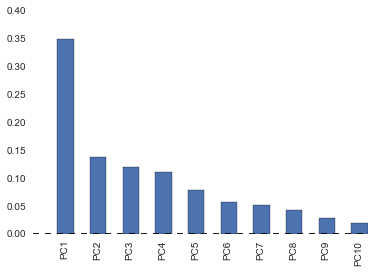

In [9]:
p = pd.DataFrame([pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()],
             index = ['Variance Ratio', 'Cumulative Variance Ratio'],
             columns = map('PC{}'.format, range(1, len(pca.components_)+1)))
p.T['Variance Ratio'].plot(kind = 'bar')
p

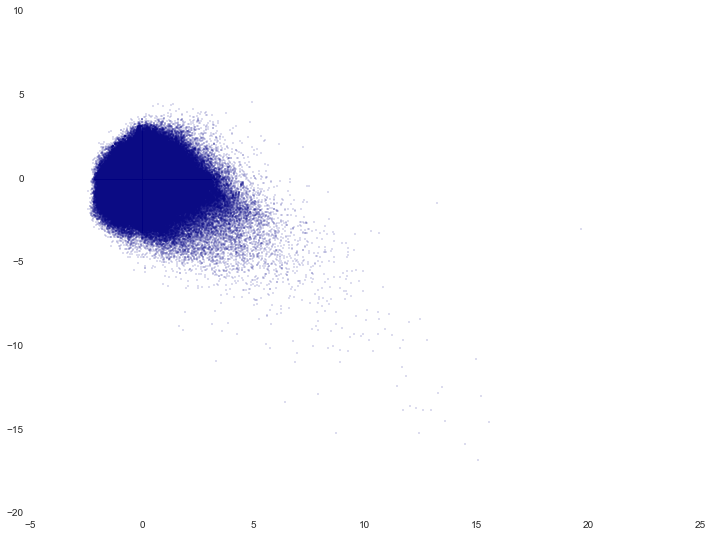

In [10]:
pca2 = PCA(2, whiten=True)
X_pca2 = pca2.fit_transform(X_pca)
plt.figure(figsize=(12,9))
plt.scatter(X_pca2[:,0], X_pca2[:,1], s=2, alpha=.2)

PCA doesn't help dimensionality reduction much (7 of 10 components required for 90% variance), and PC1 being the most important with others being a clump.

#KMeans

### Hyperparameter tuning
Beware, do not run below http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [11]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

results = {}
for i in range(2, 50, 1):
    kmeans = MiniBatchKMeans(i)
    kmeans.fit(XS)
    score = metrics.silhouette_score(XS.values, kmeans.labels_, metric='euclidean', sample_size=1000)
    results[i] = score

results

C:\Users\dfeng\AppData\Local\Continuum\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


{2: 0.25242743380730231,
 3: 0.16347858977142085,
 4: 0.16746956322086168,
 5: 0.19478278483075342,
 6: 0.15259273501396595,
 7: 0.1940187046313977,
 8: 0.16751316369489172,
 9: 0.18273991749125662,
 10: 0.18947641824770364,
 11: 0.18039901268980266,
 12: 0.19103262107231261,
 13: 0.18279654494213038,
 14: 0.18285817530498649,
 15: 0.19385523286982539,
 16: 0.15564544808067385,
 17: 0.14577435566505106,
 18: 0.15559801050769681,
 19: 0.1557692970562308,
 20: 0.15897514265464752,
 21: 0.18280913074776048,
 22: 0.16007390850548067,
 23: 0.14913553358697096,
 24: 0.17675468699342553,
 25: 0.16598267832100264,
 26: 0.16783759664885112,
 27: 0.17059334180531968,
 28: 0.15480799218357788,
 29: 0.17127621666205387,
 30: 0.14145241944788914,
 31: 0.1428401974600336,
 32: 0.15840993643760889,
 33: 0.14801774228848552,
 34: 0.15016464930851742,
 35: 0.15007684235329122,
 36: 0.13449312133830296,
 37: 0.11972712236252719,
 38: 0.1516240088690459,
 39: 0.15670406916298762,
 40: 0.13022688448353684

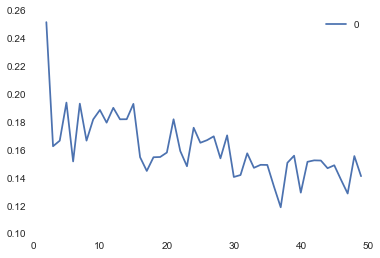

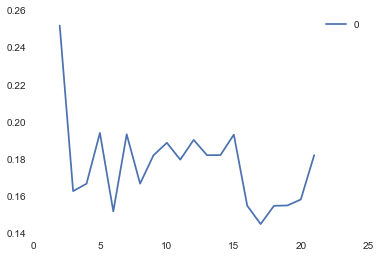

In [20]:
results_df = pd.DataFrame.from_dict(results, orient = 'index').sort()
results_df.plot()
results_df[0:20].plot()

5, 7, 15 all look appropriate

### Fitting KMeans
Starting with 8 (instead of a high number) for visualization purposes

In [21]:
from sklearn.cluster import MiniBatchKMeans

km5 = MiniBatchKMeans(5, verbose = 1) # tends to converge in the 20s, varying max_iter does not matter
km5.fit(XS)
fh5 = km5.labels_
fh5_df = pd.Series(fh5, name = 'fh', index = XS.index)
X5 = XS.join(fh5_df)
X5 = X5.join(base[['FIDELITY_LATITUDE', 'FIDELITY_LONGITUDE']])
X5.head()

Init 1/3 with method: k-means++
Inertia for init 1/3: 2181.770598
Init 2/3 with method: k-means++
Inertia for init 2/3: 2347.154549
Init 3/3 with method: k-means++
Inertia for init 3/3: 2045.271935
Minibatch iteration 1/866200: mean batch inertia: 4.884475, ewa inertia: 4.884475 
Minibatch iteration 2/866200: mean batch inertia: 5.952564, ewa inertia: 4.884722 
Minibatch iteration 3/866200: mean batch inertia: 6.079475, ewa inertia: 4.884997 
Minibatch iteration 4/866200: mean batch inertia: 5.317833, ewa inertia: 4.885097 
Minibatch iteration 5/866200: mean batch inertia: 5.799246, ewa inertia: 4.885308 
Minibatch iteration 6/866200: mean batch inertia: 5.936390, ewa inertia: 4.885551 
Minibatch iteration 7/866200: mean batch inertia: 5.313861, ewa inertia: 4.885650 
Minibatch iteration 8/866200: mean batch inertia: 6.986639, ewa inertia: 4.886135 
Minibatch iteration 9/866200: mean batch inertia: 4.722799, ewa inertia: 4.886098 
Minibatch iteration 10/866200: mean batch inertia: 4.90

,ASSESSED_IMP_VALUE,landval_perc,BED,BATH,AGE,STORIES,PARKING,TOTAL_UNITS,BUILDING_AREA,lot_perc,CONDO,COOP,MFR,MOBILE,SFR,SFR-PUD,TOWNHOUSE,fh,FIDELITY_LATITUDE,FIDELITY_LONGITUDE
0,-0.838977,-0.920036,-1.357258,-1.402316,3.056489,1.453791,-1.013395,-0.343086,-1.560742,0.403491,0,0,0,0,1,0,0,1,37.803152,-122.296821
1,-0.201410,-0.606001,-1.357258,-2.045683,3.056489,1.453791,-1.013395,-0.343086,-1.560742,0.403491,0,0,0,0,1,0,0,1,37.803141,-122.296767
2,-0.620955,-1.723638,0.797052,-0.115582,3.056489,1.453791,-1.013395,-0.343086,-0.061600,-1.973411,0,0,0,0,1,0,0,0,37.803136,-122.296740
3,-0.781338,-0.434721,0.797052,-0.758949,3.056489,1.453791,-1.013395,-0.343086,-0.781188,-0.832498,0,0,0,0,1,0,0,1,37.803125,-122.296685
4,-0.854400,-0.453274,0.797052,-0.115582,3.471452,1.453791,-1.013395,2.165914,-0.167903,-1.804867,0,0,1,0,0,0,0,1,37.803093,-122.296523


# Visualization

In [22]:
# This cell initializes the map projections
from mpl_toolkits.basemap import Basemap

bayarea  = Basemap(projection='merc', lat_0=((37.2056+38.385)/2), lon_0 = ((-122.791-121.667)/2),
                   llcrnrlat = 37.205572, llcrnrlon = -122.791252,
                   urcrnrlat = 38.385387, urcrnrlon = -121.667213,
                   resolution = 'h', area_thresh = 0.001)

# northbay = Basemap()

# southbay = Basemap()

eastbay = Basemap(projection='merc', lat_0=((37.796+37.9026)/2), lon_0=((-122.318-122.204)/2),
                  llcrnrlat = 37.796372, llcrnrlon = -122.318089,
                  urcrnrlat = 37.902642, urcrnrlon = -122.204105,
                  resolution = 'h', area_thresh = 0.001)

sf = Basemap(projection='merc', lat_0=((37.7077+37.8339)/2), lon_0=((-122.511243-122.361039)/2),
             llcrnrlat = 37.707739, llcrnrlon = -122.511243,
             urcrnrlat = 37.833933, urcrnrlon = -122.361039,
             resolution = 'h', area_thresh = 0.001)

In [23]:
import numpy as np
def plot_pts(df, proj, markersize, alpha, fillcolor, bcolor, cmap):
    # df represents dataframe
    # proj represents what map, with eastbay, sf and bayarea as possible values
    plt.figure(figsize=(18,18))
    proj.drawcoastlines(color=bcolor)
    proj.drawmapboundary(color='gray', fill_color = 'lightblue')
    proj.fillcontinents(color = fillcolor)
    
    k = df.fh.max() + 1
    # k denotes how many clusters / colors of dots
    
    color_list = cmap(np.linspace(0, 1, k))
    
    for i in range(k):
        lat = df.FIDELITY_LATITUDE[df.fh == i].tolist()
        lon = df.FIDELITY_LONGITUDE[df.fh == i].tolist()
        x,y = proj(lon,lat)
        
        proj.plot(x, y, marker = 'o', markersize=markersize, linestyle = 'None',
                  markerfacecolor = (color_list[i][0], color_list[i][1], color_list[i][2]),
                  alpha = alpha, label = i)
        
    plt.legend(loc = "upper right")
    
# This function returns the points in dataframe df (must contain lat/long) on a proj (sf, bayarea, eastbay)
# with markersize 1-10, alpha .1/.2/.5/1, fillcolor white/none for the land, bcolor for the coastline,
# cmap (e.g. plt.cm.Paired) for color-scheme of points

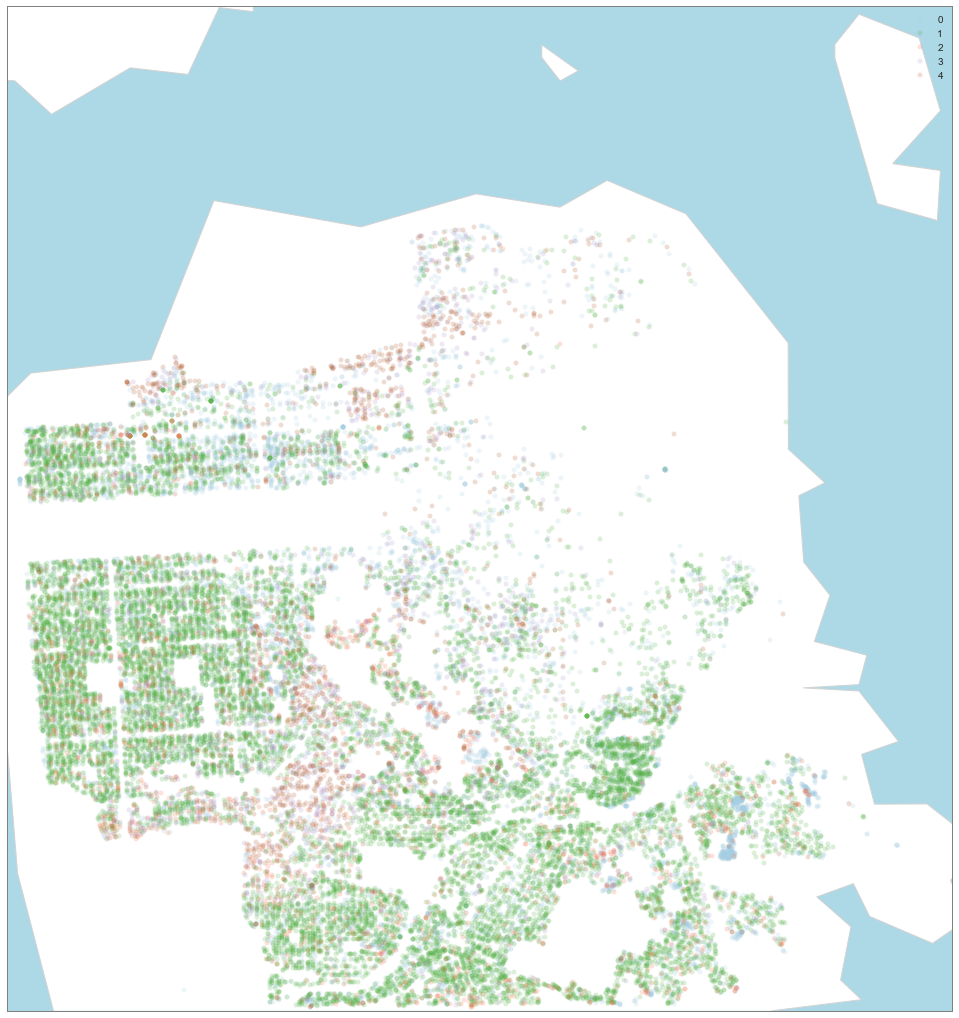

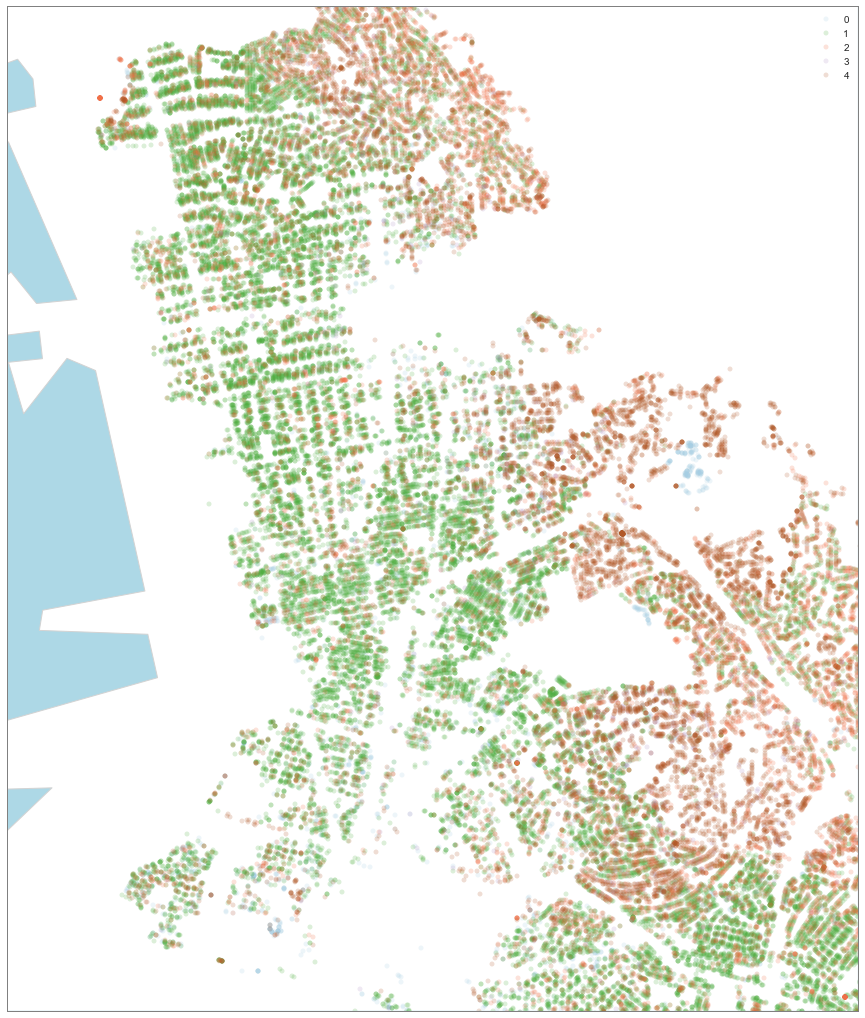

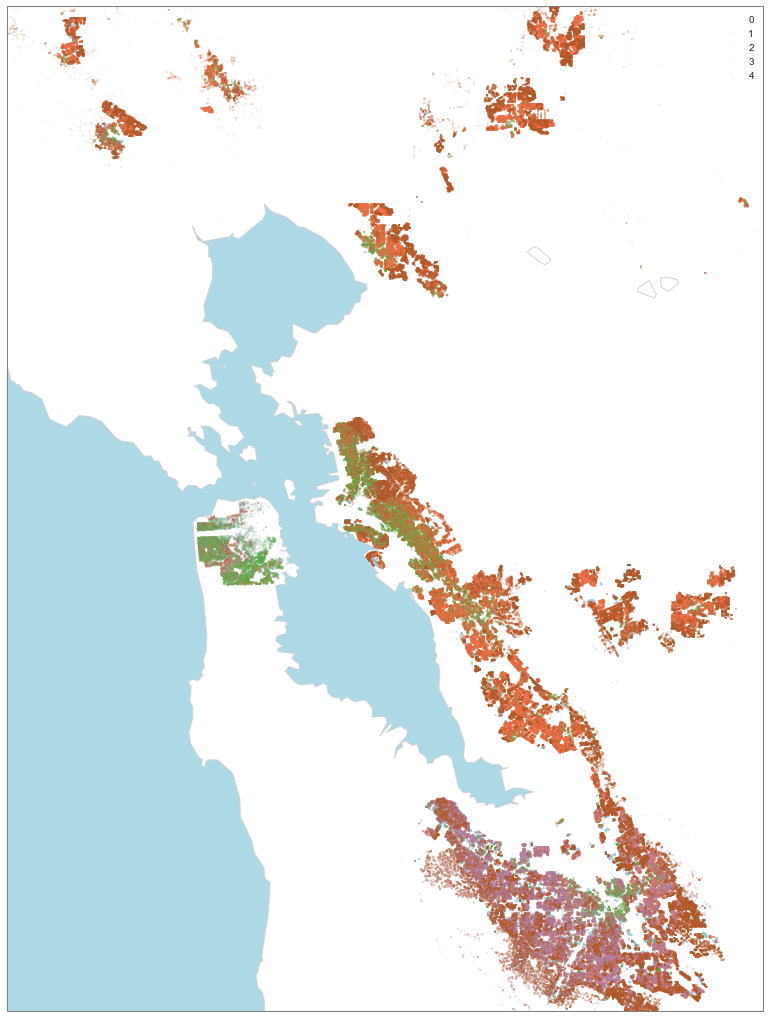

In [24]:
plot_pts(X5, sf, 5, .2, 'white', 'lightgray', plt.cm.Paired)
plot_pts(X5, eastbay, 5, .2, 'white', 'lightgray', plt.cm.Paired)
plot_pts(X5, bayarea, 2, .1, 'white', 'lightgray', plt.cm.Paired)

# Drawing the Decision Boundaries in the Mesh Grid
## Using SVC rbf kernel
### Investigation

In [ ]:
# Focusing only on SF for visualization
X_sf = X5[(X5.FIDELITY_LATITUDE > 37.7078) &
          (X5.FIDELITY_LATITUDE < 37.834) &
          (X5.FIDELITY_LONGITUDE > -122.51) &
          (X5.FIDELITY_LONGITUDE < -122.36)]

## Using kNN
### Investigation

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

knn_params = {
    'n_neighbors' : [1, 10, 50, 100, 200, 250],
    'metric' : ['minkowski', 'euclidean', 'manhattan', 'chebyshev', 'haversine'],
    'weights' : ['uniform', 'distance']
    }

knn_test1 = GridSearchCV(KNeighborsClassifier(), knn_params, 
                         cv=ShuffleSplit(len(X_sf), test_size=0.2, n_iter=1, random_state=0), # hack for cv=1/leave-p-out
                         verbose=3, refit=False, n_jobs=1)
knn_test1.fit(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh)

print knn_test1.best_score_
print knn_test1.best_params_
knn_test1.grid_scores_

NameError: name 'X_sf' is not defined

In [24]:
score1 = [x[2][0] for x in knn_test1.grid_scores_]
# score2 = [x[2][1] for x in knn_test1.grid_scores_]
setting = [x[0] for x in knn_test1.grid_scores_]
distmetric = [x['metric'] for x in setting]
weights = [x['weights'] for x in setting]
n_neighbors = [x['n_neighbors'] for x in setting]

knn_df = pd.DataFrame(zip(score1, distmetric, weights, n_neighbors), 
                      columns = ['score1', 'distmetric', 'weights', 'n_neighbors'])

import numpy as np
from itertools import cycle

colors = cycle('rgbcmykw')
distmetric_ids = knn_df.distmetric.unique()
fig = plt.figure()
ax1 = fig.add_subplot(121)

for label, c in zip(distmetric_ids, colors):
    ax1.scatter(knn_df.ix[knn_df.distmetric == label, 'n_neighbors'], knn_df.ix[knn_df.distmetric == label, 'score1'],
    c=c, label=label, marker = 'o')
    # ax1.scatter(knn_df.ix[knn_df.distmetric == label, 'n_neighbors'], knn_df.ix[knn_df.distmetric == label, 'score2'],
    # c=c)
ax1.legend(loc = 'lower right')
ax1.set_xlim(0,250)

ax2 = fig.add_subplot(122)

weights_ids = knn_df.weights.unique()
for label, c in zip(weights_ids, colors):
    ax2.scatter(knn_df.ix[knn_df.weights == label, 'n_neighbors'], knn_df.ix[knn_df.weights == label, 'score1'],
    c=c, label=label, marker = 'o')
    # ax2.scatter(knn_df.ix[knn_df.weights == label, 'n_neighbors'], knn_df.ix[knn_df.weights == label, 'score2'],
    # c=c)
    
ax2.legend(loc = 'lower right')
ax2.set_xlim(0,250)

NameError: name 'knn_test1' is not defined

In [ ]:
%timeit
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = range(1,10,2)

scores = []
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'haversine')
    knn.fit(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh)
    scores.append(knn.score(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh))
    
plt.plot(n_neighbors, scores, linewidth=3)

It appears that I'm getting opposite results because the gridsearch cross-validates, while my little loop validates against training. I want the training error... Also can't pipeline clustering + classification together :(
Have responses on StackOverflow on how to perform gridsearch without CV, can use meta-estimator to do the latter per jnoth's suggestion on scikit-learn

In [ ]:
knn_f = KNeighborsClassifier(1)
knn_f.fit(X_sf[['FIDELITY_LONGITUDE', 'FIDELITY_LATITUDE']], X_sf.fh)

plot_pts(X_sf, sf, 4, .2, 'None', 'darkgray', plt.cm.Paired)
    
h = .002
y_min, y_max = 37.7078, 37.834
x_min, x_max = -122.51, -122.36
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_f.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
sf.contourf(xx, yy, Z, latlon = True, cmap=plt.cm.Paired, alpha=0.5)

# sf.drawlsmask(ocean_color = 'navy', resolution = 'h')

plt.show()

# What's Next
 - Try kNN
 - Infinite iterations on EC2
 - Try different values for k-means
 - Try DBSCAN, Birch
 - Refine gridsearch
 - Build via zipcode
 - Check out clusters in PCA
 - Build via tilemaps
 - Analyze cluster attributes
 - Cluster neighborhoods instead